In [16]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

import geometry
import model
import solvers

In [17]:
mesh, BCs = geometry.getArc()
coordinates, connectivity = mesh['coordinates'], mesh['connectivity']

modelA = model.Model()
modelA.mesh.addNodes(coordinates)
modelA.mesh.addConnectivity(connectivity)

modelA.material.setProperties(40000, 0.2)
modelA.section.setProperties(1)

modelA.setBoundaryConditions(BCs)

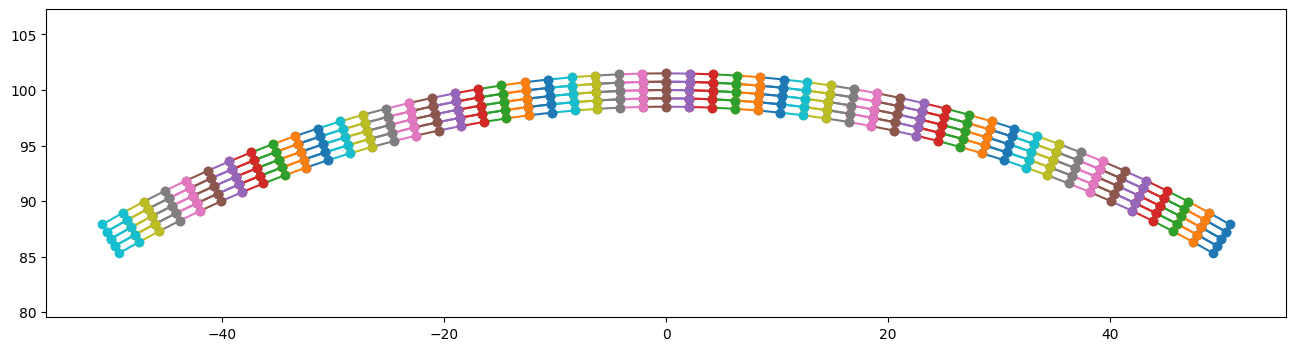

In [18]:
modelA.plotUndeformed(size=(16, 4))

In [19]:
solver = solvers.Static()

solver.setTolerance(1e-3)
solver.setMaxIterations(20)
solver.setSolutionAttempts(5)

In [20]:
# Arc-length
solver.setConstraint("Load")
u, lambdas = solver.solve(modelA, np.ones(1000))

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(u, lambdas)

plt.xlabel('Displacement')
plt.ylabel(r'$\lambda$')

In [ ]:
modelA.plotUndeformed()
modelA.plotDeformed(scale=1, alpha=0.25)